<a href="https://colab.research.google.com/github/HaySafitri/202055202074--Nurhayati-Safitri/blob/master/Deteksiuang1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install packages
!pip install torch torchvision torchaudio
!pip install ultralytics
!pip install gtts
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
!pip install -r requirements.txt
%cd ..

# Import libraries
import torch
from IPython.display import display, Image
from google.colab import drive
import os
from gtts import gTTS
import IPython.display as ipd
import yaml
import shutil

# Mount Google Drive
drive.mount('/content/drive')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 76.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 59.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 44.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 60.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [4]:
# Fungsi konfigurasi dataset
def create_dataset_config():
    data_yaml = {
        'path': '/content/drive/MyDrive/yolo_datasetfix',
        'train': 'images/train',
        'val': 'images/valid',
        'test': 'images/test',
        'nc': 5,
        'names': ['100Ribu', '50Ribu', '20Ribu', '10Ribu', '5Ribu']
    }

    with open('dataset.yaml', 'w') as f:
        yaml.dump(data_yaml, f, default_flow_style=False)

    print("File dataset.yaml telah dibuat")
    return os.path.abspath('dataset.yaml')

# Fungsi verifikasi struktur
def verify_dataset_structure():
    base_path = '/content/drive/MyDrive/yolo_datasetfix'
    if not os.path.exists(base_path):
        raise Exception(f"Error: Folder dasar {base_path} tidak ditemukan!")

    required_folders = [
        'images/train', 'images/valid', 'images/test',
        'labels/train', 'labels/valid', 'labels/test'
    ]

    all_valid = True
    for folder in required_folders:
        full_path = os.path.join(base_path, folder)
        if not os.path.exists(full_path):
            print(f"Error: Folder tidak ditemukan: {full_path}")
            all_valid = False
        else:
            file_count = len([name for name in os.listdir(full_path)])
            print(f"✓ Folder {folder} ditemukan dengan {file_count} file")

    return all_valid

# Fungsi training
def start_training():
    print("Memverifikasi dataset...")
    if not verify_dataset_structure():
        raise Exception("Struktur dataset tidak valid!")

    print("\nMembuat konfigurasi dataset...")
    yaml_path = create_dataset_config()

    print("\nMemulai proses training...")
    print("Ini akan memakan waktu beberapa jam tergantung pada GPU yang tersedia.")

    os.chdir('yolov5')
    !python train.py --img 640 --batch 16 --epochs 100 --data ../dataset.yaml --weights yolov5s.pt --cache
    os.chdir('..')

# Fungsi deteksi
def detect_currency(image_path):
    if not os.path.exists(image_path):
        raise Exception(f"Error: File gambar tidak ditemukan: {image_path}")

    weights_path = '/content/yolov5/runs/train/exp/weights/best.pt'
    if not os.path.exists(weights_path):
        raise Exception("Model hasil training tidak ditemukan! Pastikan training sudah selesai.")

    model = torch.hub.load('ultralytics/yolov5', 'custom', path=weights_path)
    results = model(image_path)
    detected_classes = results.pandas().xyxy[0]['name'].tolist()

    if detected_classes:
        text = f"Terdeteksi uang {', '.join(detected_classes)}"
        tts = gTTS(text=text, lang='id')
        tts.save('output.mp3')
        results.show()
        ipd.display(ipd.Audio('output.mp3'))
        return detected_classes
    else:
        print("Tidak ada mata uang yang terdeteksi")
        return []

# Fungsi test
def test_detection(test_image_path):
    print("Memulai deteksi...")
    try:
        detected = detect_currency(test_image_path)
        if detected:
            print(f"Mata uang yang terdeteksi: {', '.join(detected)}")
    except Exception as e:
        print(f"Error saat melakukan deteksi: {str(e)}")

In [5]:
# Mulai training
start_training()

Streaming output truncated to the last 5000 lines.
      56/99      4.59G     0.0223    0.00796   0.002071         32        640:  67% 37/55 [00:13<00:07,  2.34it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      56/99      4.59G    0.02229   0.007946   0.002055         36        640:  69% 38/55 [00:13<00:06,  2.51it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      56/99      4.59G    0.02222   0.007955   0.002019         37        640:  71% 39/55 [00:14<00:06,  2.44it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      56/99      4.59G    0.02222   0

Silakan upload gambar uang yang ingin dideteksi


Saving 01gaq39wp41v38jr41wc28h54x.jpg to 01gaq39wp41v38jr41wc28h54x.jpg


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2025-1-29 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7023610 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


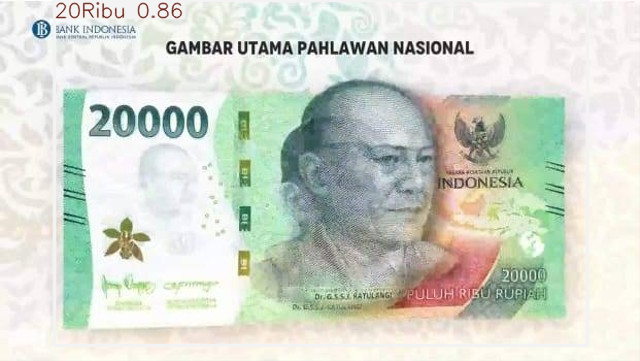

In [9]:
# Import library yang diperlukan
import torch
from gtts import gTTS
import IPython.display as ipd

def detect_currency(image_path):
    # Load model yang sudah ditraining
    model = torch.hub.load('ultralytics/yolov5', 'custom', path='/content/yolov5/runs/train/exp/weights/best.pt')

    # Lakukan deteksi
    results = model(image_path)

    # Tampilkan gambar dengan bounding box
    results.show()

    # Dapatkan kelas yang terdeteksi
    detected_classes = results.pandas().xyxy[0]['name'].tolist()

    if detected_classes:
        # Buat dan mainkan audio
        text = f"Terdeteksi uang {', '.join(detected_classes)}"
        tts = gTTS(text=text, lang='id')
        tts.save('output.mp3')
        ipd.display(ipd.Audio('output.mp3', autoplay=True))
    else:
        print("Tidak ada mata uang yang terdeteksi")

# Upload dan deteksi gambar
from google.colab import files
print("Silakan upload gambar uang yang ingin dideteksi")
uploaded = files.upload()
image_path = list(uploaded.keys())[0]
detect_currency(image_path)

In [12]:
# export model ke format TensorFlow Lite
%cd yolov5
!python export.py --weights runs/train/exp/weights/best.pt --include tflite --img 640

/content/yolov5
export: data=data/coco128.yaml, weights=['runs/train/exp/weights/best.pt'], imgsz=[640], batch_size=1, device=cpu, half=False, inplace=False, keras=False, optimize=False, int8=False, per_tensor=False, dynamic=False, cache=, simplify=False, mlmodel=False, opset=17, verbose=False, workspace=4, nms=False, agnostic_nms=False, topk_per_class=100, topk_all=100, iou_thres=0.45, conf_thres=0.25, include=['tflite']
YOLOv5 🚀 v7.0-397-gde62f93c Python-3.11.11 torch-2.5.1+cu124 CPU

Fusing layers... 
Model summary: 157 layers, 7023610 parameters, 0 gradients, 15.8 GFLOPs

PyTorch: starting from runs/train/exp/weights/best.pt with output shape (1, 25200, 10) (13.7 MB)
2025-01-29 21:45:38.755529: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1738187138.935255   24678 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to regist